In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

target = 1e-6
u = 1

In [3]:
w = numpy.zeros((nx,ny))
psi = numpy.zeros_like(w)

In [4]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [5]:
wuchaw = 1
wuchapsi = 1
a = 1

In [6]:
wn = numpy.zeros_like(w)
psin = numpy.zeros_like(psi)


In [7]:
while a>target:
    
    
    
    psin = psi.copy()
    wn = w.copy()
    w[1:-1,1:-1] = 0.25*(wn[1:-1,:-2] + wn[1:-1,2:] + wn[:-2,1:-1] + wn[2:,1:-1])
    psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((psin[1:-1,2:]+psin[1:-1,:-2])*dy**2 +\
                        (psin[2:,1:-1] + psin[:-2,1:-1])*dx**2 -\
                         w[1:-1,1:-1]*dx**2*dy**2)

    
    
    
    


    
    
    w[-1,:] = (-1/(2*dy**2))*(8*psi[-2,:] - psi[-3,:]) - 3/dy
    w[0,:] = (-1/(2*dy**2))*(8*psi[1,:] - psi[2,:]) 
    w[:,-1] =(-1/(2*dy**2))*(8*psi[:,-2] - psi[:,-3]) 
    w[:,0] = (-1/(2*dy**2))*(8*psi[:,1] - psi[:,2])
    
    wuchaw = L1norm(w,wn)
    wuchapsi = L1norm(psi, psin)
    a = max(wuchaw,wuchapsi)


    
    
    
    
    
    

    


C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in add
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in subtract
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in subtract
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in subtract
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


In [8]:
x = numpy.linspace(0, 1, nx)
y = numpy.linspace(0, 1, ny)
X, Y = numpy.meshgrid(x,y)

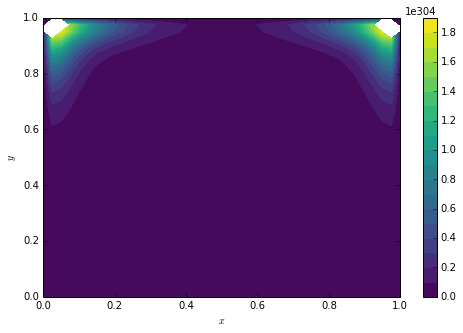

In [9]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(X,Y,psi,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [10]:
numpy.round(psi[32,::8], 4)

array([  0.00000000e+000,   2.30104751e+302,   2.43821052e+301,
         2.43821052e+301,   2.30104751e+302,   0.00000000e+000])

In [11]:
w

array([[ -0.00000000e+000,  -1.98251596e+306,  -2.16471963e+306, ...,
         -2.16471963e+306,  -1.98251596e+306,  -0.00000000e+000],
       [ -1.98338612e+306,  -1.25523348e+306,  -1.01795645e+306, ...,
         -1.01795645e+306,  -1.25523348e+306,  -1.98338612e+306],
       [ -2.17168090e+306,  -1.02100210e+306,  -6.02801323e+305, ...,
         -6.02801323e+305,  -1.02100210e+306,  -2.17168090e+306],
       ..., 
       [             -inf,              -inf,  -2.81613864e+307, ...,
         -2.81613864e+307,              -inf,              -inf],
       [              nan,              -inf,              -inf, ...,
                     -inf,              -inf,               nan],
       [ -0.00000000e+000,               nan,              -inf, ...,
                     -inf,               nan,  -0.00000000e+000]])

In [12]:
    #corners
    
    #when i = 1, j = 1
    w[1,1] = 0.25*(wn[1,2] + wn[2,1] - 4*psin[1,1]/dx**2)
    
    #when i = nx-2, j = 1
    w[1,nx-2] = 0.25*(wn[1,nx-3] + wn[2,nx-2] - 4*psin[1,nx-2]/dx**2)
    
    #i = 1, j = ny-2
    w[ny-2, 1] = 0.25*(wn[nx-2,2] + wn[nx-3,1] - 2*psin[ny-2,1]/dx**2 + \
                       ((-1/(2*dy**2))*(8*psin[ny-2,1] - psin[ny-3,1]) - 3*u/dy))
    
    #when i = nx-2, j = ny-2
    w[ny-2,nx-2] = 0.25*(wn[ny-2, nx-3] + wn[ny-3, nx-2] - 2*psin[ny-2, nx-2]/dx**2 + \
                         ((-1/(2*dy**2))*(8*psin[ny-2,nx-2] - psin[ny-3, nx-2]) - 3*u/dy))
    
    
    #boundaries
    
    #top: when j = ny-2, i from 2 to nx-3(include)
    w[ny-2,2:-2] = 0.25*(wn[ny-2,3:-1] + wn[ny-2,1:-3] + wn[ny-3,2:-2] + \
                         ((-1/(2*dy**2))*(8*psin[ny-2,2:-2] - psin[ny-3,2:-2]) - 3*u/dy))
                       
    #left: when i = 1, j from 2 to ny-3
    w[2:-2,1] = 0.25*(wn[2:-2,2] + wn[3:-1,1] + wn[1:-3,1] - 2*psin[2:-2,1]/dx**2)
    
    #bottom: when j = 1, i from 2 to nx-3(include)
    w[1,2:-2] = 0.25*(wn[1,3:-1] + wn[1,1:-3] + wn[2,2:-2] -\
                     2*psin[1,2:-2]/dy**2)
    
    #right: i = nx-2, j from 2 to ny-3
    w[2:-2,nx-2] = 0.25*(wn[2:-2,nx-3] + wn[1:-3,nx-2] + wn[3:-1,nx-2] - 2*psin[2:-2,nx-3]/dx**2)
    
    #middle: i from 2 to nx-3, j from 2 to ny-3
    w[2:-2, 2:-2] = 0.25*(wn[1:-3,2:-2] +wn[3:-1,2:-2] + wn[2:-2,1:-3] + wn[2:-2,3:-1])
    
    
    
    
    
    
    
    


       

In [13]:
    w[1:-2,1:-1] = 0.25*(wn[1:-2,2:] + wn[1:-2, :-2] + wn[2:-1, 1:-1] + wn[:-3, 1:-1])
    w[-2,1:-1] = 0.25*(wn[-2,2:] + wn[-2,:-2] + wn[-3,1:-1] + ((-1/2*dy**2)*(8*psin[-3,1:-1] - psin[-4,1:-1]) - 3*u/dy))

In [14]:
    w[1:-1,1:-1] = 0.25*(wn[1:-1,:-2] + wn[1:-1,2:] + wn[:-2,1:-1] + wn[2:,1:-1])
    w[-1,1:-1] = (-1/(2*dy**2))*(8*psin[-2,1:-1] - psin[-3,1:-1]) - 3*u/dy

In [15]:
    w[1:-1,1:-1] = 0.25*(wn[1:-1,:-2] + wn[1:-1,2:] + wn[:-2,1:-1]+ wn[2:,1:-1])
    
    w[-1,1:-1] = (-1/(2*dy**2))*(8*psin[-2,1:-1] - psin[-3,1:-1]) - 3*u/dy
    w[0,1:-1] = -2*psin[1,1:-1]
    w[1:-1,0] = -2*psin[1:-1,1]
    w[1:-1,-1] = -2*psin[1:-1,-2]

In [16]:
    w[2:-2,2:-2] = 0.25*(wn[2:-2,1:-3] + wn[2:-2,3:-1] + wn[1:-3,2:-2]+ wn[3:-1,2:-2])
    
    w[-2,2:-2] = 0.25*(wn[-2,3:-1] + wn[-2,1:-3] + wn[-3,2:-2] + ((-1/2*dy**2)*(8*psin[-3,2:-2] - psin[-4,2:-2]) - 3*u/dy))
    w[1,2:-2] = 0.25*(-2*psin[1,2:-2]+ wn[1,1:-3] +wn[1,3:-1]+wn[2,2:-2])
    w[2:-2,1] = 0.25*(wn[2:-2,2]+wn[1:-3,1]+wn[3:-1,1]- 2*psin[2:-2,1]/dx**2)
    w[2:-2,-2] = 0.25*(wn[2:-2,-3]+wn[1:-3,-2]+wn[3:-1,-2]-2*psin[2:-2,-2]/dx**2)